### Requirements

In [1]:
!pip install cdsapi
!pip install netCDF4

In [28]:
import xarray as xr             # to open and manipulate data arrays 
import numpy as np
import scipy
import pickle
from scipy import stats
import pandas as pd
from netCDF4 import Dataset
import statistics as stat
import cdsapi
import matplotlib.pyplot as plt

In [3]:
!echo "url: https://cds.climate.copernicus.eu/api/v2" > $HOME/.cdsapirc
!echo "key: 64778:7e219602-9f4c-4b76-913d-874a661088c8" >> $HOME/.cdsapirc

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Procuring and Reading Geospatial Data


In [ ]:
#Downloading the Temperature dataset
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': '2m_temperature',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03','04', '05', '06','07', '08', '09','10', '11', '12','13', '14', '15','16', '17', '18','19', '20', '21','22', '23', '24','25', '26', '27','28', '29', '30','31',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    '/content/drive/My Drive/ML/temperature.nc')

In [ ]:
#Downlading the Precipitation dataset
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'total_precipitation',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03','04', '05', '06','07', '08', '09','10', '11', '12','13', '14', '15','16', '17', '18','19', '20', '21','22', '23', '24','25', '26', '27','28', '29', '30','31',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    '/content/drive/My Drive/ML/precipitation.nc')


In [ ]:
#Downlading the Volumetric soil water layer dataset
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'volumetric_soil_water_layer_1',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03','04', '05', '06','07', '08', '09','10', '11', '12','13', '14', '15','16', '17', '18','19', '20', '21','22', '23', '24','25', '26', '27','28', '29', '30','31',
        ],
        'time': '12:00',
        'format': 'netcdf',
    },
    '/content/drive/My Drive/ML/volumetricsoil.nc')


In [5]:
#xarray dataset representation of Temperature data
dataT = xr.open_dataset("/content/drive/My Drive/ML/temperature.nc")
dataT

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-29 12:59:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [6]:
#xarray dataset representation of Precipitation data
dataP = xr.open_dataset('/content/drive/My Drive/ML/precipitation.nc')
dataP

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-25 09:10:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
#xarray dataset representation of Volumetric soil data
dataV = xr.open_dataset('/content/drive/My Drive/ML/volumetricsoil.nc')
dataV

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-25 09:11:16 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### Exploring and Visualising Geospatial Data



*   Temperature dataset



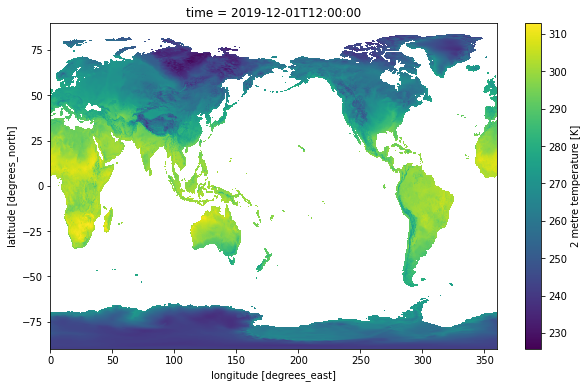

In [8]:
#representation of 2m Temperature
st = dataT.t2m
%matplotlib inline
st[0].plot(figsize=(10, 6))

In [9]:
print('mean_temp =',np.mean(st))
print('median_temp =',np.median(st))
print('var_temp =',np.var(st))
print('stdev_temp =',np.std(st))
print('max_temp =',np.max(st))
print('min_temp=',np.min(st))
print('range_temp =',np.max(st)- np.min(st))

mean_temp = <xarray.DataArray 't2m' ()>
array(268.24347, dtype=float32)
median_temp = nan
var_temp = <xarray.DataArray 't2m' ()>
array(9301.73535156)
stdev_temp = <xarray.DataArray 't2m' ()>
array(96.44550323)
max_temp = <xarray.DataArray 't2m' ()>
array(317.77365112)
min_temp= <xarray.DataArray 't2m' ()>
array(221.28518677)
range_temp = <xarray.DataArray 't2m' ()>
array(96.48846436)


---
In this dataset there will be too many NaN points and we have to deal with it. These NaN datapoints means that there is no geospacial data available for that location which we can see that it will be the sea. Hence we will convert all NaN datapoints as 0. This is because we dont want any empty data while training our model hence it is meaningful to replace them 0.


---






In [9]:
st = st.fillna(0)  #were replacing the NaN with 0.



*   Precipitation dataset



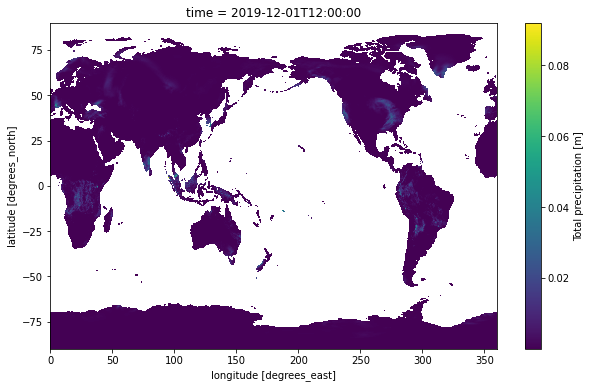

In [10]:
#representation of Precipitation data
sp = dataP.tp
%matplotlib inline
sp[0].plot(figsize=(10, 6))

In [12]:
print('mean_preci =',np.mean(sp))
print('median_preci =',np.median(sp))
print('var_preci =',np.var(sp))
print('stdev_preci =',np.std(sp))
print('max_preci =',np.max(sp))
print('min_preci =',np.min(sp))
print('range_preci =',np.max(sp)- np.min(sp))

mean_preci = <xarray.DataArray 'tp' ()>
array(0.00069312, dtype=float32)
median_preci = nan
var_preci = <xarray.DataArray 'tp' ()>
array(6.23911365e-06)
stdev_preci = <xarray.DataArray 'tp' ()>
array(0.00249782)
max_preci = <xarray.DataArray 'tp' ()>
array(0.21889278)
min_preci = <xarray.DataArray 'tp' ()>
array(7.4505806e-09)
range_preci = <xarray.DataArray 'tp' ()>
array(0.21889278)


In [11]:
sp = sp.fillna(0) #same is here, were replacing the NaN with 0.



*   Volumetric soil dataset



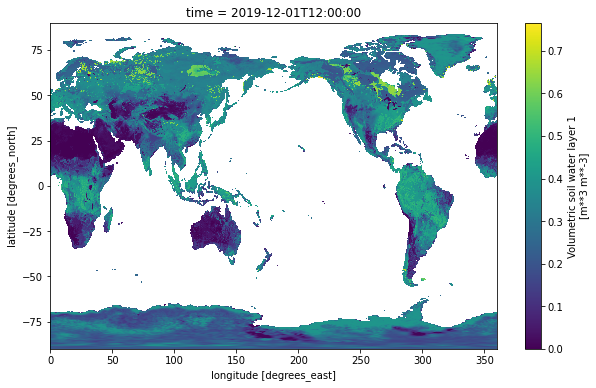

In [12]:
sv = dataV.swvl1
%matplotlib inline
sv[0].plot(figsize=(10, 6))

In [15]:
print('mean_vol =',np.mean(sv))
print('median_vol =',np.median(sv))
print('var_vol =',np.var(sv))
print('stdev_vol =',np.std(sv))
print('max_vol =',np.max(sv))
print('min_vol =',np.min(sv))
print('range_vol =',np.max(sv)- np.min(sv))

mean_vol = <xarray.DataArray 'swvl1' ()>
array(0.2649494, dtype=float32)
median_vol = nan
var_vol = <xarray.DataArray 'swvl1' ()>
array(0.02741185)
stdev_vol = <xarray.DataArray 'swvl1' ()>
array(0.16556524)
max_vol = <xarray.DataArray 'swvl1' ()>
array(0.76600647)
min_vol = <xarray.DataArray 'swvl1' ()>
array(0.)
range_vol = <xarray.DataArray 'swvl1' ()>
array(0.76600647)


In [13]:
sv = sv.fillna(0)  #same is here, were replacing the NaN with 0.

### Preprocessing Geospatial Data

1.   The spatial resolution
2.   fixing skew dataset





#WARNING: The following code is not advised to run as it crashes Colab
But the logic to convert SPATIAL RESLOUTION from 0.1x0.1 (degrees) to 0.05x0.05 (degrees) is correct.
Below this piece of code I have used a sample dataset where it is demonstrated how this same piece of code
can convert the spatial resolution successfully.

In [ ]:
### WARNING: The following code is not advised to run as it crashes the 12GB RAM of Colab 

## Changing spacial resolution of 0.1x0.1 into 0.05x0.05 for Temperature dataset

sr_temp = dataT.fillna(0)
new_lat = np.linspace(sr_temp.latitude[0], sr_temp.latitude[-1], sr_temp.dims["latitude"] * 2)
new_lon = np.linspace(sr_temp.longitude[0], sr_temp.longitude[-1], sr_temp.dims["longitude"] * 2)
sr_temp_data = sr_temp.interp(latitude=new_lat,longitude=new_lon)
sr_temp_data #new 0.05x0.05 resolution temperature dataset

## Changing spacial resolution of 0.1x0.1 into 0.05x0.05 for Precipitation dataset

sr_prec = dataP.fillna(0)
new_lat = np.linspace(sr_prec.latitude[0], sr_prec.latitude[-1], sr_prec.dims["latitude"] * 2)
new_lon = np.linspace(sr_prec.longitude[0], sr_prec.longitude[-1], sr_prec.dims["longitude"] * 2)
sr_prec_data = sr_prec.interp(latitude=new_lat,longitude=new_lon)
sr_prec_data #(new 0.05x0.05 resolution precipitation dataset)

## Changing spacial resolution of 0.1x0.1 into 0.05x0.05 for Volumetric soil dataset

sr_vol = dataV.fillna(0)
new_lat = np.linspace(sr_vol.latitude[0], sr_vol.latitude[-1], sr_vol.dims["latitude"] * 2)
new_lon = np.linspace(sr_vol.longitude[0], sr_vol.longitude[-1], sr_vol.dims["longitude"] * 2)
sr_vol_data = sr_vol.interp(latitude=new_lat,longitude=new_lon)
sr_vol_data #(new 0.05x0.05 resolution volumetric soil dataset)

**Here i will perform the same task on a smaller dataset to display the validity of the code**

In [17]:
'''
example dataset
'''
ds = xr.tutorial.open_dataset("air_temperature").isel(time=0) 
ds # the old dataset with spatial resolution as 2.5 x 2.5

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Data variables:
    air      (lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [18]:
''' this is the same piece of code used to manipulate the data given to us originally by using the interpolation function of xarray'''

new_lon = np.linspace(ds.lon[0], ds.lon[-1], ds.dims["lon"] * 2)
new_lat = np.linspace(ds.lat[0], ds.lat[-1], ds.dims["lat"] * 2)
dsi = ds.interp(lat=new_lat, lon=new_lon)
dsi # the new dataset with spatial resolution of 1.25 x 1.25

<xarray.Dataset>
Dimensions:  (lat: 50, lon: 106)
Coordinates:
    time     datetime64[ns] 2013-01-01
  * lat      (lat) float64 75.0 73.78 72.55 71.33 ... 18.67 17.45 16.22 15.0
  * lon      (lon) float64 200.0 201.2 202.5 203.7 ... 326.3 327.5 328.8 330.0
Data variables:
    air      (lat, lon) float64 241.2 241.8 242.5 243.0 ... 296.8 296.7 296.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Text(0.5, 1.0, 'New data')

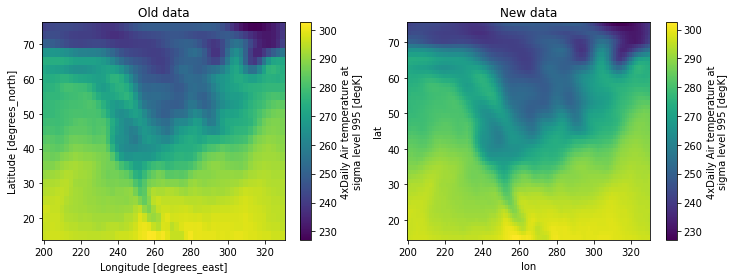

In [19]:
# visual representation of the change, we can see the change in the visual representation as well in the datasets too.

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
ds.air.plot(ax=axes[0])
axes[0].set_title("Old data")
dsi.air.plot(ax=axes[1])
axes[1].set_title("New data")

#2. fixing skewness of precipitation data
*   We will be using log transformation to solve the skewness of the recipitation dataset.


In [14]:
dataP #the orignal data that is skewed

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-25 09:10:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

(array([6.8436371e+07, 1.4117100e+05, 1.5473000e+04, 3.8770000e+03,
        1.1820000e+03, 4.5600000e+02, 1.6200000e+02, 5.2000000e+01,
        7.0000000e+00, 2.0000000e+00]),
 array([7.4505806e-09, 2.1889284e-02, 4.3778561e-02, 6.5667838e-02,
        8.7557115e-02, 1.0944639e-01, 1.3133568e-01, 1.5322495e-01,
        1.7511423e-01, 1.9700350e-01, 2.1889278e-01], dtype=float32),
 <a list of 10 Patch objects>)

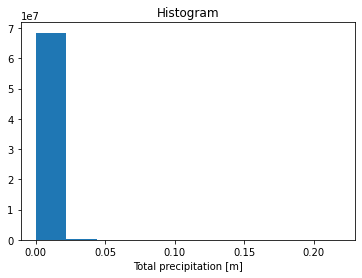

In [15]:
dataP.tp.plot.hist() # here we can see how skewed the data is

In [16]:
sp_new = np.log(dataP.tp) # skewness is fixed by using log transformation
sp_new  

<xarray.DataArray 'tp' (time: 31, latitude: 1801, longitude: 3600)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-10.529902 , -10.529902 , -10.529902 , ..., -10.529902 ,
         -10.529902 , -10.529902 ],
        [-10.529902 , -10.529902 , -10.529902 , ..., -10.529902 ,
         -10.529902 , -10.529902 ],
        [-10.12453  , -10.12453  , -10.12453  , ..., -10.12453  ,
         -10.12453  , -10.12453  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ -9.6136675,  -9.6136675,  -9.6136675, ...,  -9.6136675,
          -9.6136675,  -9.6136675],
        [ -9.66492  ,  -9.66492  ,  -9.66492  , ...,  -9.6136675,
          -9.6136675,  -9.66492  ],
        [ -9.3136   ,  -9.3136   ,  -9.3136   , ...,  -9.3136   ,
          -9.3136   ,  -9.3136   ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-10.99985  , -10.99985  , -10.99985  , ..., -10.99985  ,
         -10.99985  , -10.99985  ],
        [-10.99985  , -10.99985  , -10.99985  , ..., -10.99985  ,
         -10.99985  , -10.99985  ],
        [-10.211474 , -10.211474 , -10.211474 , ..., -10.211474 ,
         -10.211474 , -10.211474 ]],

       ...,

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-12.607951 , -12.607951 , -12.607951 , ..., -12.607951 ,
         -12.607951 , -12.607951 ],
        [-12.607951 , -12.607951 , -12.607951 , ..., -12.607951 ,
         -12.607951 , -12.607951 ],
        [-18.714973 , -18.714973 , -18.714973 , ..., -18.714973 ,
         -18.714973 , -18.714973 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ -9.6136675,  -9.6136675,  -9.6136675, ...,  -9.6136675,
          -9.6136675,  -9.6136675],
        [ -9.6136675,  -9.6136675,  -9.6136675, ...,  -9.6136675,
          -9.6136675,  -9.6136675],
        [-11.222771 , -11.222771 , -11.222771 , ..., -11.222771 ,
         -11.222771 , -11.222771 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-18.714973 , -18.714973 , -18.714973 , ..., -18.714973 ,
         -18.714973 , -18.714973 ],
        [-18.714973 , -18.714973 , -18.714973 , ..., -18.714973 ,
         -18.714973 , -18.714973 ],
        [-18.714973 , -18.714973 , -18.714973 , ..., -18.714973 ,
         -18.714973 , -18.714973 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 8

(array([24913495.,        0.,        0.,  6602140.,  8163657., 11066456.,
        10153525.,  6054693.,  1615693.,    29094.]),
 array([-18.714973 , -16.995394 , -15.275813 , -13.556233 , -11.836654 ,
        -10.117073 ,  -8.397493 ,  -6.677913 ,  -4.9583335,  -3.2387533,
         -1.5191733], dtype=float32),
 <a list of 10 Patch objects>)

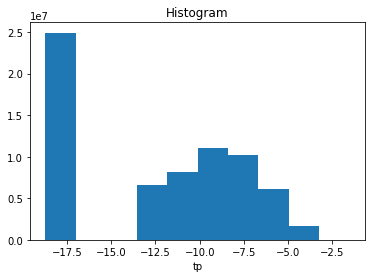

In [17]:
sp_new.plot.hist() 

(array([2.49134950e+07, 0.00000000e+00, 0.00000000e+00, 8.14897600e+06,
        1.10215920e+07, 1.24400000e+07, 8.68797100e+06, 3.25669000e+06,
        1.29974000e+05, 1.32392902e+08]),
 array([-18.714973 , -16.843475 , -14.971979 , -13.100481 , -11.228984 ,
         -9.357487 ,  -7.4859896,  -5.614492 ,  -3.7429948,  -1.8714974,
          0.       ], dtype=float32),
 <a list of 10 Patch objects>)

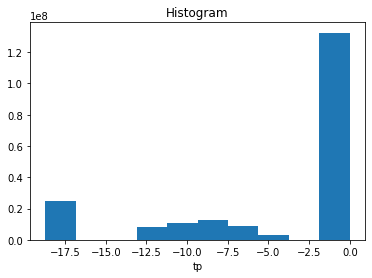

In [18]:
sp_new1 = sp_new.fillna(0)  #changing the nan values to 0 of the unskewed data
sp_new1.plot.hist() 

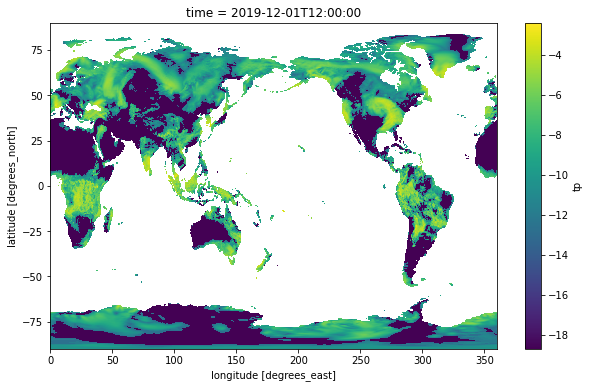

In [25]:
sp_new[0].plot(figsize=(10, 6)) # plotting the unskewed data gives a better visualisation of the data

#Deep Learning for Geospatial Data

*  **How you will split the data for training, validation & testing**
> The data will be splited into **80% for training** and **10% testing** and **10% for validation** on the basis of number of days of December 2019. So 24 days data will be used for training, 4 days for testing and 3 days for validation
*  **Implementations for data loading, data transformations & inverse transformation**
> To create the input and the output dataset for training, we **merged** the **two parameters** (i.e temperature and volumetric soil water level dataset) to form the input for our model. For the output dataset, we used the unskewed dataset for precipitation. The dimentions for the input train and output train dataset were then (2,24,1801,3600) and (24,1801,3600) respectively. These datasets were then flattened and converted into tensors to be used in our pytorch model. 
*  **Choice of Model architecture**
> The model architecture will be a simple linear neural network. I chosed to bring about a linear relationship between temperature, precipitation and volumetric soil water level, as scientificlly we have been taught that as the temperatures at the earth's surface increases then more evaporation occurs, and hence more precipitation occurs. If more precipitation occurs then the volumetric soil water level will increase. All these inferences convinced me that all the three parameters (temperature,precipitation,volumetric soilwater level) are somewhat linearly related and hence i choose to select linear regression model to predict one parameter on the basis of the ther parameters.
*  **Obtaining and Fine-tuning a pre-trained model if used**
> Reshaping the pretrained weights according to our neural network input layer. In our case the input layer had 2 features so the weights must be reshaped as (x,2) so the weights should be reshaped as (2,y).[where x is the number of datapoints and y is the number of neurons in the first neural network layer]
*  **Your choice of activation function, loss function and error metrics.** 
> Loss function will be "Mean Square Error" as it would best notify us about the performance of our predictions. Activation function is linear as we want a linear relation for our predictions. one more reason for it is that ur predictions have negative values so we dont want to limit the values by other activation functions like ReLu, tanh, etc. 
*  **How you will avoid overfitting (and implementation of solution).** 
> Overfitting of the model can be avoided by adding Dropouts in our neural networks model.
*  **What factors do you think might restrict the model from achieving a high accuracy?**
> The foremst assumption for creating this training model was that we assumed the relationship between temperature, precipitation and volumetric soil water level to be linearly related to each other. However, this assumption doesn't always hold true in most of the cases. Hence, the reason for low accuracy for the data is assuming the parametes have linear dependency.

In [19]:
x = xr.merge([st,sv])  # creating data array of temerature and volumetric soil water data
y = xr.merge([sp_new1])# creating data array of the unskewed precipitation data

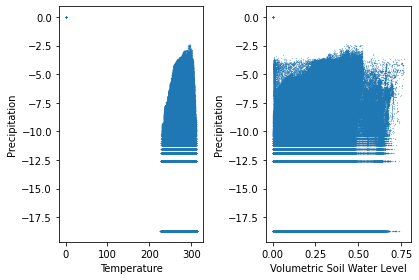

In [24]:
#checking dependency of temperature and volumetric soil water level on precipitation
plt.subplot(1,2,1) 
plt.scatter(x.t2m[0],y.tp[0],s=0.1,marker='.')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.subplot(1,2,2)
plt.scatter(x.swvl1[0],y.tp[0],s=0.1,marker='.')
plt.xlabel('Volumetric Soil Water Level')
plt.ylabel('Precipitation')
plt.tight_layout()

In [25]:
x_train = x.isel(time=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]) #about 80% of temerature and volumetric data
y_train = y.isel(time=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]) #about 80% of precipitation data
x_test = x.isel(time=[24,25,26,27]) #about 10% of temerature and volumetric data
y_test = y.isel(time=[24,25,26,27]) #about 10% of precipitation data
x_val = x.isel(time=[28,29,30]) #about 10% of temerature and volumetric data
y_val = y.isel(time=[28,29,30]) #about 10% of precipitation data

The data will be saved in the drive folder to be used for training the model

In [ ]:
with open('/content/drive/My Drive/ML/x_train.txt','wb') as f1:
  pickle.dump(x_train,f1)
with open('/content/drive/My Drive/ML/y_train.txt','wb') as f2:
  pickle.dump(y_train,f2)
with open('/content/drive/My Drive/ML/x_test.txt','wb') as f3:
  pickle.dump(x_test,f3)
with open('/content/drive/My Drive/ML/y_test.txt','wb') as f4:
  pickle.dump(y_test,f4)
with open('/content/drive/My Drive/ML/x_val.txt','wb') as f5:
  pickle.dump(x_val,f5)
with open('/content/drive/My Drive/ML/y_val.txt','wb') as f6:
  pickle.dump(y_val,f6)

In [ ]:
import torch
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
!pip install torchviz
%matplotlib inline

In [30]:
x_train = pickle.load(open('/content/drive/My Drive/ML/x_train.txt','rb'))
y_train = pickle.load(open('/content/drive/My Drive/ML/y_train.txt','rb'))
x_test =  pickle.load(open('/content/drive/My Drive/ML/x_test.txt','rb'))
y_test = pickle.load(open('/content/drive/My Drive/ML/y_test.txt','rb'))
x_val =  pickle.load(open('/content/drive/My Drive/ML/x_val.txt','rb'))
y_val =  pickle.load(open('/content/drive/My Drive/ML/y_val.txt','rb'))

In [31]:
x_train = torch.from_numpy(np.array([x_train.t2m.to_dataset().to_array().values.ravel(),x_train.swvl1.to_dataset().to_array().values.ravel()]).T).float()
y_train = torch.from_numpy(np.array(y_train.to_array().values.ravel())).float()
x_test = torch.from_numpy(np.array([x_test.t2m.to_dataset().to_array().values.ravel(),x_test.swvl1.to_dataset().to_array().values.ravel()]).T).float()
y_test = torch.from_numpy(np.array(y_test.to_array().values.ravel())).float()
x_val = torch.from_numpy(np.array([x_val.t2m.to_dataset().to_array().values.ravel(),x_val.swvl1.to_dataset().to_array().values.ravel()]).T).float()
y_val = torch.from_numpy(np.array(y_val.to_array().values.ravel())).float()
y_train = torch.reshape(y_train,(y_train.shape[0],1))
y_test = torch.reshape(y_test,(y_test.shape[0],1))
y_val = torch.reshape(y_val,(y_val.shape[0],1))
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

torch.Size([155606400, 2]) torch.Size([155606400, 1])
torch.Size([25934400, 2]) torch.Size([25934400, 1])
torch.Size([19450800, 2]) torch.Size([19450800, 1])


**While training the below model, the notebook crashed multiple and hence I couldnt compute the predictions and get the model accuracy.**

In [32]:
import numpy as np
import torch
from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_tensor = x_train
y_tensor = y_train
x_tensor_val = x_val
y_tensor_val = y_val

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

dataset = CustomDataset(x_tensor, y_tensor) # dataset for training tensors
dataset_val = CustomDataset(x_tensor_val, y_tensor_val) # dataset for validation tensors

In [ ]:
train_dataset, val_dataset = dataset, dataset_val
train_loader = DataLoader(dataset=train_dataset, batch_size=128)
val_loader = DataLoader(dataset=val_dataset, batch_size=128)

class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 128)
        self.linear2 = nn.Linear(128,64)
        self.output = nn.Linear(64,1)
  
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.output(x)
        return x

def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(y, yhat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

model = ManualLinearRegression().to(device) 
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01)
train_step = make_train_step(model, loss_fn, optimizer)

n_epochs = 100
training_losses = []
validation_losses = []
print(model.state_dict())

for epoch in range(n_epochs):
    batch_losses = []
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        loss = train_step(x_batch, y_batch)
        batch_losses.append(loss)
    training_loss = np.mean(batch_losses)
    training_losses.append(training_loss)

    with torch.no_grad():
        val_losses = []
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            model.eval()
            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat).item()
            val_losses.append(val_loss)
        validation_loss = np.mean(val_losses)
        validation_losses.append(validation_loss)

    print(f"[{epoch+1}] Training loss: {training_loss:.3f}\t Validation loss: {validation_loss:.3f}")

print(model.state_dict())

OrderedDict([('linear1.weight', tensor([[-0.2709,  0.5906],
        [ 0.1975,  0.1582],
        [-0.5451, -0.5183],
        [ 0.0744, -0.2803],
        [ 0.6813,  0.0523],
        [ 0.1236, -0.4790],
        [ 0.6544, -0.2045],
        [ 0.3257, -0.5306],
        [-0.4935, -0.1920],
        [ 0.3272,  0.1053],
        [-0.6286, -0.0943],
        [ 0.5539, -0.2452],
        [-0.1234, -0.6961],
        [ 0.0395, -0.4038],
        [ 0.1774, -0.3678],
        [ 0.4047, -0.3193],
        [-0.1235,  0.1581],
        [-0.2530,  0.3857],
        [-0.1823,  0.4762],
        [-0.2489, -0.2105],
        [-0.0780,  0.0128],
        [ 0.1968,  0.2265],
        [-0.0406,  0.0342],
        [-0.4679, -0.3973],
        [ 0.6224, -0.2653],
        [-0.6023,  0.3475],
        [ 0.4822, -0.2141],
        [-0.1594,  0.4765],
        [-0.7033,  0.0639],
        [ 0.2060,  0.6914],
        [-0.6326, -0.5781],
        [-0.5938,  0.1272],
        [ 0.1686,  0.2784],
        [ 0.3630,  0.2365],
        [-0.0361